## *Bankers in the Ivory Tower*
### By Charlie Eaton

### Figure 6.5: Regression estimates for enrollments, student debt, bond interest, and state funding

In [1]:
use data/d6_3_5_ipeds_instate_debt_bond, clear

In [2]:
quietly {
    keep if iclevel==1 & control<3
collapse (first) control instnm systemnm fips (min) sector iclevel (rawsum) applicants ///
ftfirstefbkaat ftfirstefhispt ftfirsteftotlt admissions interest2 interest01 fte_count total03_revenue total01 ///
instate total_frosh_res state03 state09 nettuition01 loan_t fgrnt_t fgrnt_d loan_d fgrnt_n loan_n ///
(mean) loan_a loan_p [aweight=ftfirsteftotlt], by (systemid year)
gen acceptrate = admissions / applicants * 100
gen instate_p=instate / total_frosh_res
gen interest_fte=interest01 / fte_count
gen interest_share=interest01 / total01 * 100
gen state_fte=state03 / fte_count
gen tuitionrev_fte=nettuition01 / fte_count
gen fgrnt_p = fgrnt_n / fgrnt_d * 100
replace fgrnt_p=round(fgrnt_p)
replace instatefrosh=total_frosh_res if control==2
gen instatefroshln=log(instatefrosh)
gen state_fteln=log(state_fte)
gen loan_share= loan_t / total01 * 100    
gen state_p=state03 / total03_revenue * 100
gen lnnettuition=log(nettuition01)
gen lnnettuition_fte=log(nettuition01 / fte_count)
    gen nettuition_fte=nettuition01 / fte_count
gen tuition_p=nettuition01 / total03_revenue * 100
gen state_p2=state03 / total01 * 100
gen tuition_p2=nettuition01 / total01 * 100 
gen loan_ftf=loan_t/loan_n *4
gen loan_co=loan_n / (loan_p / 100)
gen lnloan_ftf=log(loan_ftf)
gen rtuition_state=(nettuition01/state03)
gen lnloan_a=log(loan_a)
gen lnstate=log(state03)
gen lntotal_rev_fte=log(total03_revenue/fte_count)
gen lntotal_rev=log(total03_revenue)
gen lnstate_fte=log(state03 / fte_count)
gen lnstateerev=log(state03)
gen statepctrev=state03/total03_revenue*100
replace instatefroshln=. if instatefroshln==0
replace interest_share=. if total01==0 | interest01==0
foreach var in rtuition_state interest_share acceptrate total03_revenue {
winsor `var', p(.01) gen(`var'w)
replace `var'=`var'w
}
set scheme plotplainblind
drop if control>2
drop if control==2 & iclevel>1
xtset systemid year
    label var tuitionrev_fte "tuition revenue per student"
    label var loan_a "mean borrowing per borrower (2017 $)"
    label var loan_p "% students borrowing"
    label var fgrnt_p "% students receiving Pell"

quietly gen pubpriv="public" if control==1
quietly replace pubpriv="private" if control==2

gen pctblack=ftfirstefbkaat / ftfirsteftotlt * 100
    gen pctlatinx=ftfirstefhispt / ftfirsteftotlt * 100

    rename fips statecode

merge m:1 statecode year using /Users/Charlie/Dropbox/Stata_Notebooks/racedebtstrat/cdcbridgedstatehispanic19902019 ///
, gen(sthispmerge)
merge m:1 statecode year using /Users/Charlie/Dropbox/Stata_Notebooks/racedebtstrat/cdcbridgedstateracenonhispanic19902019 ///
, gen(stracemerge)
}












Variables that uniquely identify margins: interest_share


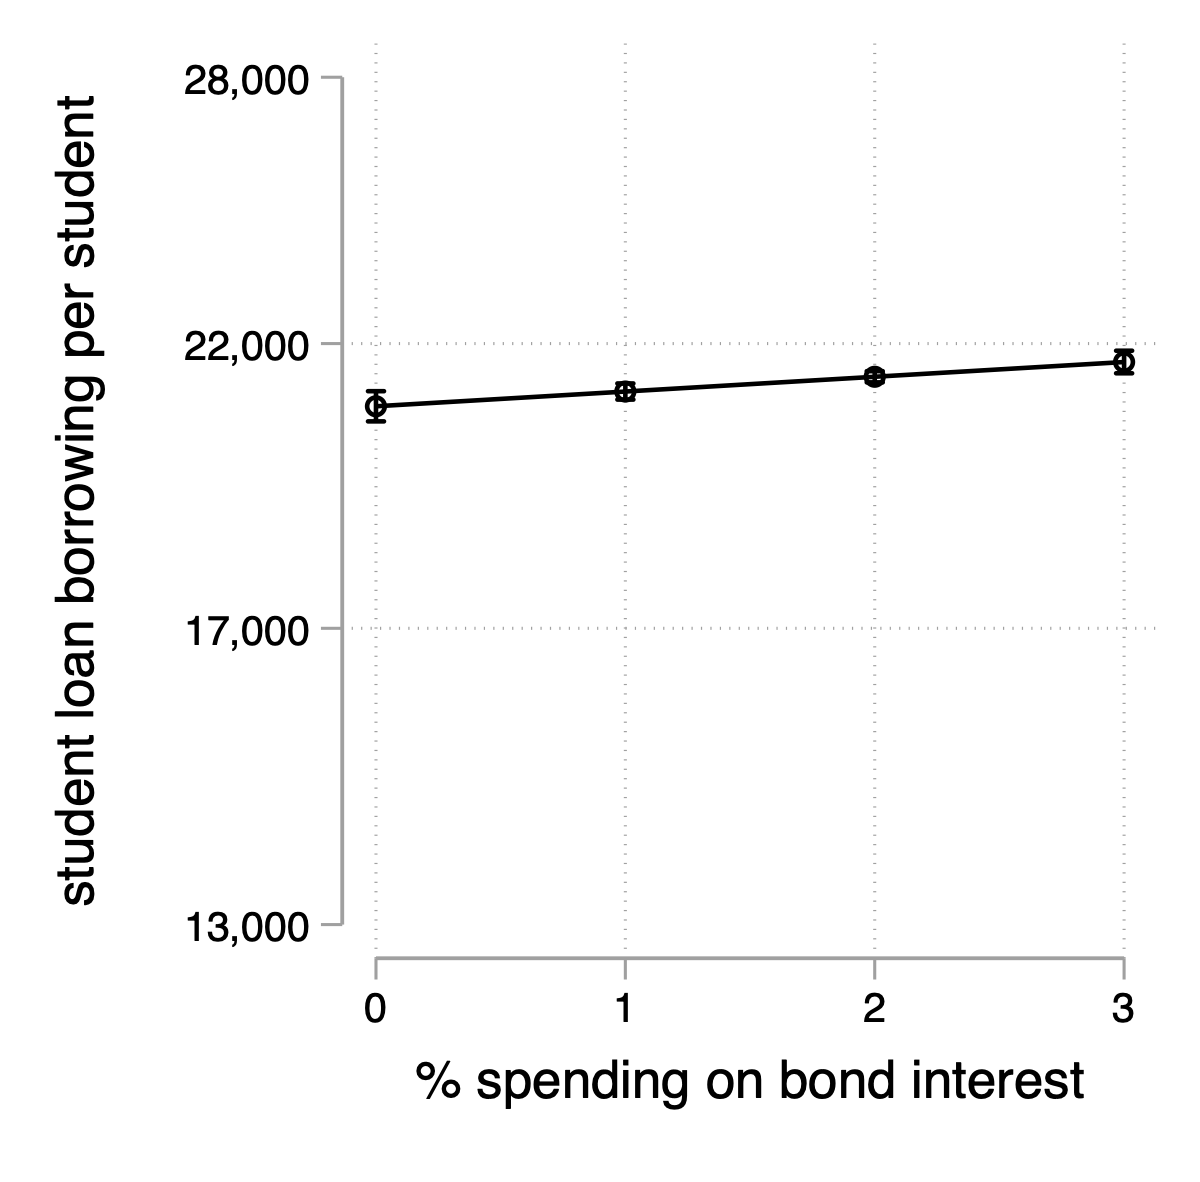



file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 6 - The Middle -
    Publics/figures/f6_5b_loaninterest.pdf saved as PDF format









In [3]:
quietly mylabels 13000 17000 22000 28000, myscale(ln(@)) local(loanstate) format(%10.0fc)
quietly reghdfe lnloan_ftf statepctrev interest_share lntotal_rev_fte acceptrate ///
pop* if control==1, absorb(systemid year) vce(robust)
quietly  margins, at(statepctrev=(0(25)100))
quietly marginsplot, ylab(`loanstate') yscale(titlegap(*-5)) title("", size(medium)) ///
ytitle(student loan borrowing per student, margin(zero)) ///
xlab() xtitle(% revenue from state) name(loanstate, replace)

qui reghdfe interest_share statepctrev lnloan_ftf lntotal_rev_fte acceptrate ///
pop* if control==1, absorb(systemid year) vce(robust)
quietly margins, at(statepctrev=(0(25)100))
quietly marginsplot, ylab() yscale(titlegap(*23)) title("", size(medium)) ///
ytitle("% spending on bond interest", margin(zero)) ///
xlab() xtitle(% revenue from state) name(bondstate, replace)

*quietly mylabels 20000 21000 22000 23000, myscale(ln(@)) local(loaninterest) format(%10.0fc)
qui reghdfe lnloan_ftf statepctrev interest_share lntotal_rev_fte acceptrate ///
pop* if control==1, absorb(systemid year) vce(robust)
qui margins, at(interest_share=(0(1)3))
marginsplot, ylab(`loanstate') yscale(titlegap()) title("", size(medium)) ///
ytitle(student loan borrowing per student, margin(zero)) ///
xlab() xtitle(% spending on bond interest) name(loaninterest, replace) ysize(3.2) xsize(3.25) scale(1.3)
graph export figures/f6_5b_loaninterest.pdf, replace

quietly mylabels 1095 1150 1210 1275 1340, myscale(ln(@)) local(froshenroll) format(%10.0fc)
quietly mylabels 13000 17000 22000 28000, myscale(ln(@)) local(froshloan) format(%10.0fc)
qui reghdfe instatefroshln statepctrev lnloan_ftf interest_share lntotal_rev_fte acceptrate ///
pop* if control==1, absorb(systemid year) cluster(systemid)
quietly margins, at(lnloan_ftf=(9.472 9.74 9.999 10.24))
qui marginsplot, ylab(`froshenroll') yscale(titlegap(*-3)) title("", size(medium)) ytitle(in-state frosh enrollment, margin(zero)) ///
xlab(`loanstate') xtitle(student loan borrowing per student) name(froshloan, replace)

quietly margins, at(interest_share=(0(1)3))
quietly marginsplot, ylab(`froshenroll') yscale(titlegap(*-3)) title("", size(medium)) ytitle(in-state frosh enrollment, margin(zero)) ///
xlab(0(1)3) xtitle(bond interest as % of spending) name(froshbond, replace)

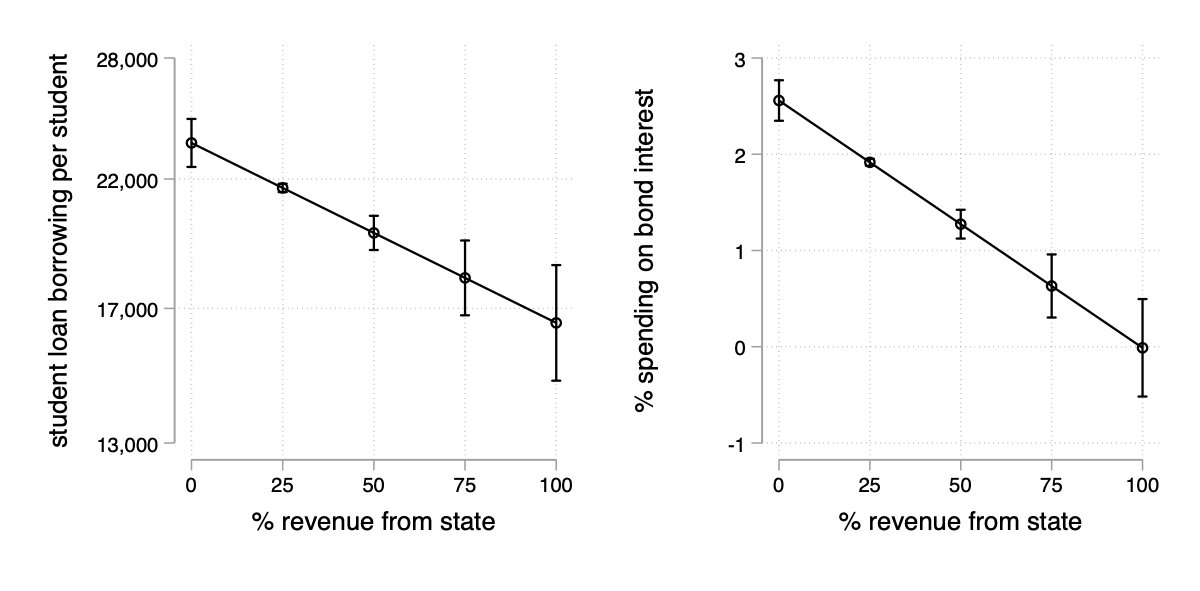




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 6 - The Middle -
    Publics/figures/f6_5a_loanbondstate.pdf saved as PDF format


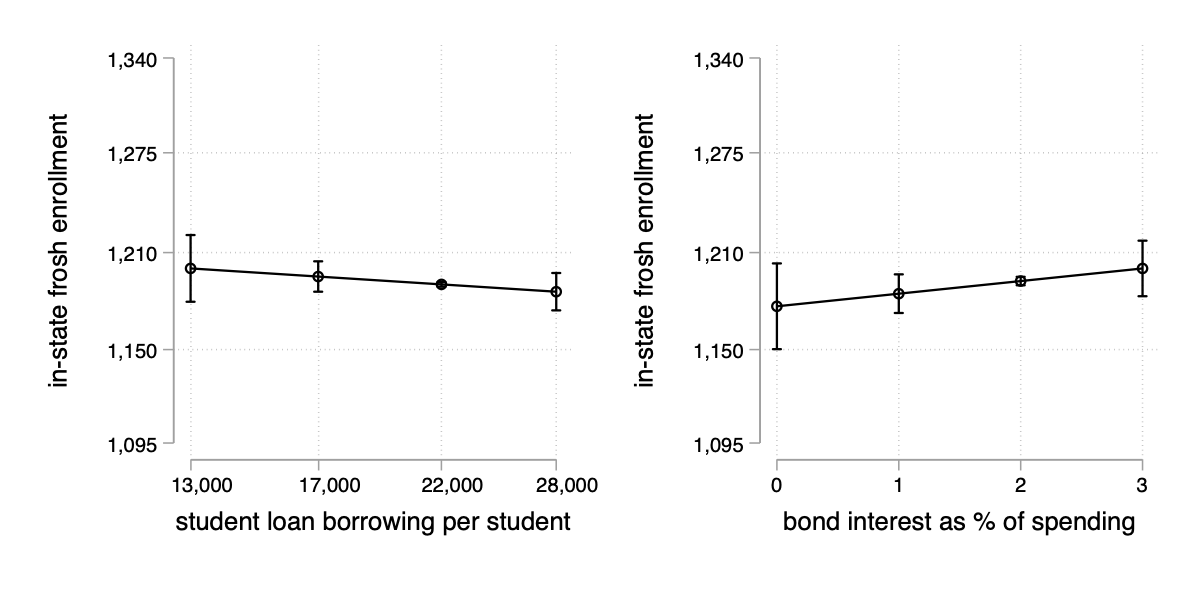




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 6 - The Middle -
    Publics/figures/f6_5c_frosh_loan_bond.pdf saved as PDF format


In [4]:
graph combine loanstate bondstate, xcommon xsize(6.5) ysize(3.2) iscale(1.3)
graph export figures/f6_5a_loanbondstate.pdf, replace

graph combine froshloan froshbond, xsize(6.5) ysize(3.2) iscale(1.3)
graph export figures/f6_5c_frosh_loan_bond.pdf, replace